In [153]:
# IMPORTS
import os, json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
# FILTER JSON FILES
json_files = [pos_json for pos_json in os.listdir() if pos_json.endswith('.json')]

In [155]:
# LOAD JSON FILES
json_data = []
for json_file in json_files:
    with open(json_file, 'r') as f:
        json_data.append(json.load(f))

In [156]:
# PARSE
results = pd.DataFrame(columns=['PC', 'Family', 'Test', 'Time (ms)'])
for d in json_data:
    hardware = d['Hardware']
    processor = hardware['ProcessorType'].split(' @ ')[0].split('CPU')[0].split(')')
    pc_id = processor[len(processor)-1] + '(' + str(hardware['ProcessorCount']) +' cores), ' + str(hardware['SystemMemorySizeMB']) + '(MB) RAM' + ' [' + hardware['DeviceName'] + ']'
    pc_id = pc_id.replace('.', '_')
    for result in d['Results']:
        name = result['Name']
        for sample in result['SampleGroups'][0]['Samples']:
            results = results.append({ 'PC':pc_id, 'Family':name.split('.')[0], 'Test':name.split('.')[1], 'Time (ms)':sample }, ignore_index=True)
results_by_family = [(pd.DataFrame(y), x) for x, y in results.groupby('Family', as_index=False)]

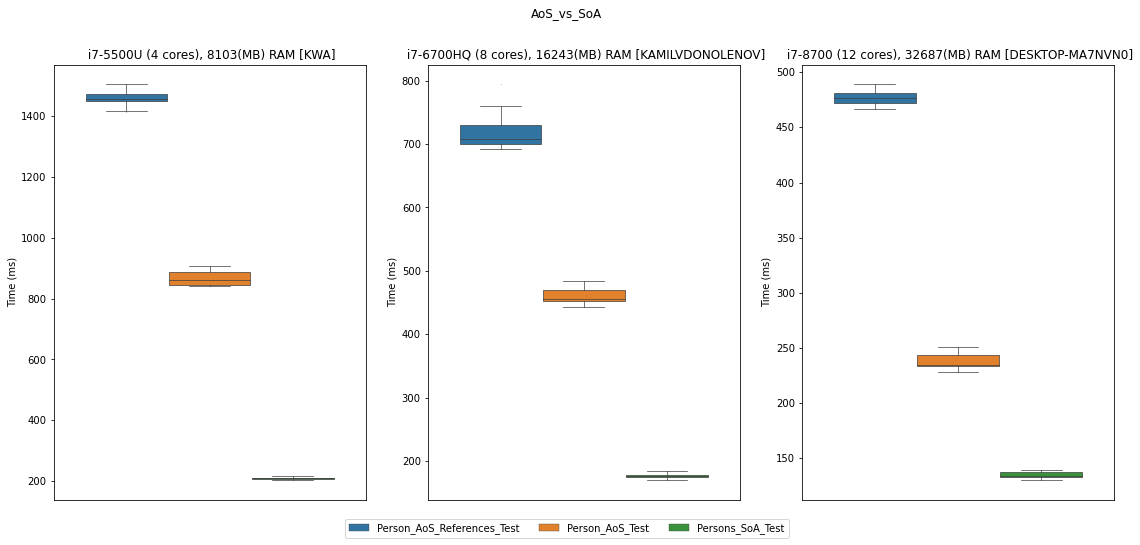

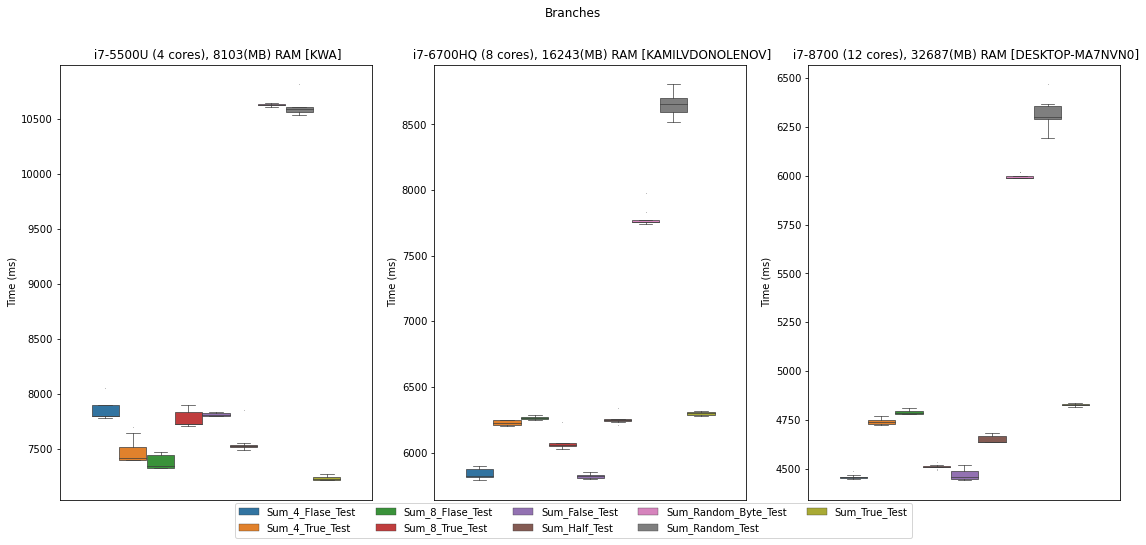

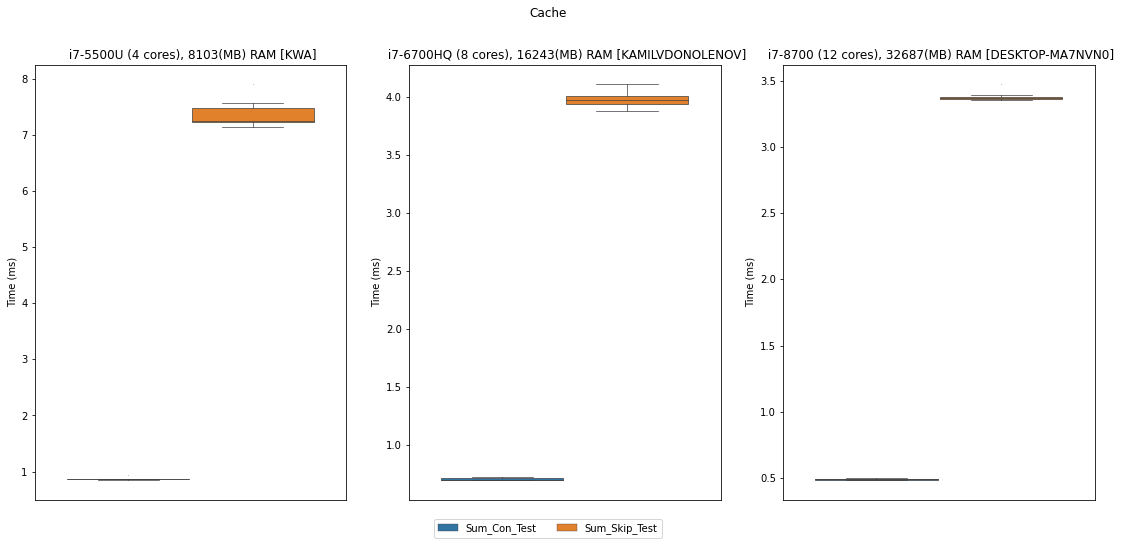

In [160]:
for family_results in results_by_family:
    family = family_results[1]
    results_by_pc = [(pd.DataFrame(y), x) for x, y in family_results[0].groupby('PC', as_index=False)]
    count = len(results_by_pc)
    rows = int((count-1)/3)+1
    f, axes = plt.subplots(rows, 3, figsize=(19,rows*8))
    axes = axes.flatten()
    f.suptitle(family)
    for index, pc_results in enumerate(results_by_pc):
        df = pc_results[0]
        ax = axes[index]
        ax.get_xaxis().set_visible(False)
        ax.set_title(pc_results[1])
        sns.boxplot(x='PC', y='Time (ms)', hue='Test', data=df, fliersize=0.1, linewidth=0.7, ax=axes[index])
        ax.get_legend().remove()
    for x in range(len(results_by_pc), rows*3):
        axes[x].axis('off')
    handles, labels = axes[0].get_legend_handles_labels()
    legend = f.legend(handles, labels, loc=8, bbox_to_anchor=(0.5, 0.05), ncol=5)
    plt.savefig(family+'.png')